# SARIMA: All the Districts

### 1. Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Reading the Dataset

In [2]:
# Paths
path = '../data/CSV/'
file = 'city_districts.csv'

df = pd.read_csv(path+file,index_col='dispatch_date',parse_dates=True)
df.index.freq = 'M'

df.head()

,city,dist_1,dist_2,dist_18,dist_77,dist_3,dist_5,dist_6,dist_14,dist_17,dist_7,dist_8,dist_9,dist_16,dist_15,dist_22,dist_24,dist_12,dist_19,dist_35,dist_25,dist_26,dist_39
dispatch_date,,,,,,,,,,,,,,,,,,,,,,,
2006-01-31,19359,512,794,898,62,468,290,899,1134,642,362,681,638,568,1410,804,1341,1126,1066,1188,1532,701,910
2006-02-28,15894,385,712,676,52,444,283,723,830,572,325,654,518,440,1205,649,1027,863,894,1003,1352,572,662
2006-03-31,18627,561,817,771,61,533,257,777,1008,664,335,623,683,607,1368,741,1306,1076,954,1111,1678,659,792
2006-04-30,18940,466,922,843,49,565,282,759,1025,766,389,598,657,594,1367,767,1325,1126,941,1126,1578,776,721
2006-05-31,20041,458,1029,918,62,509,259,867,1100,778,428,664,747,648,1391,837,1259,1164,1038,1242,1642,796,833


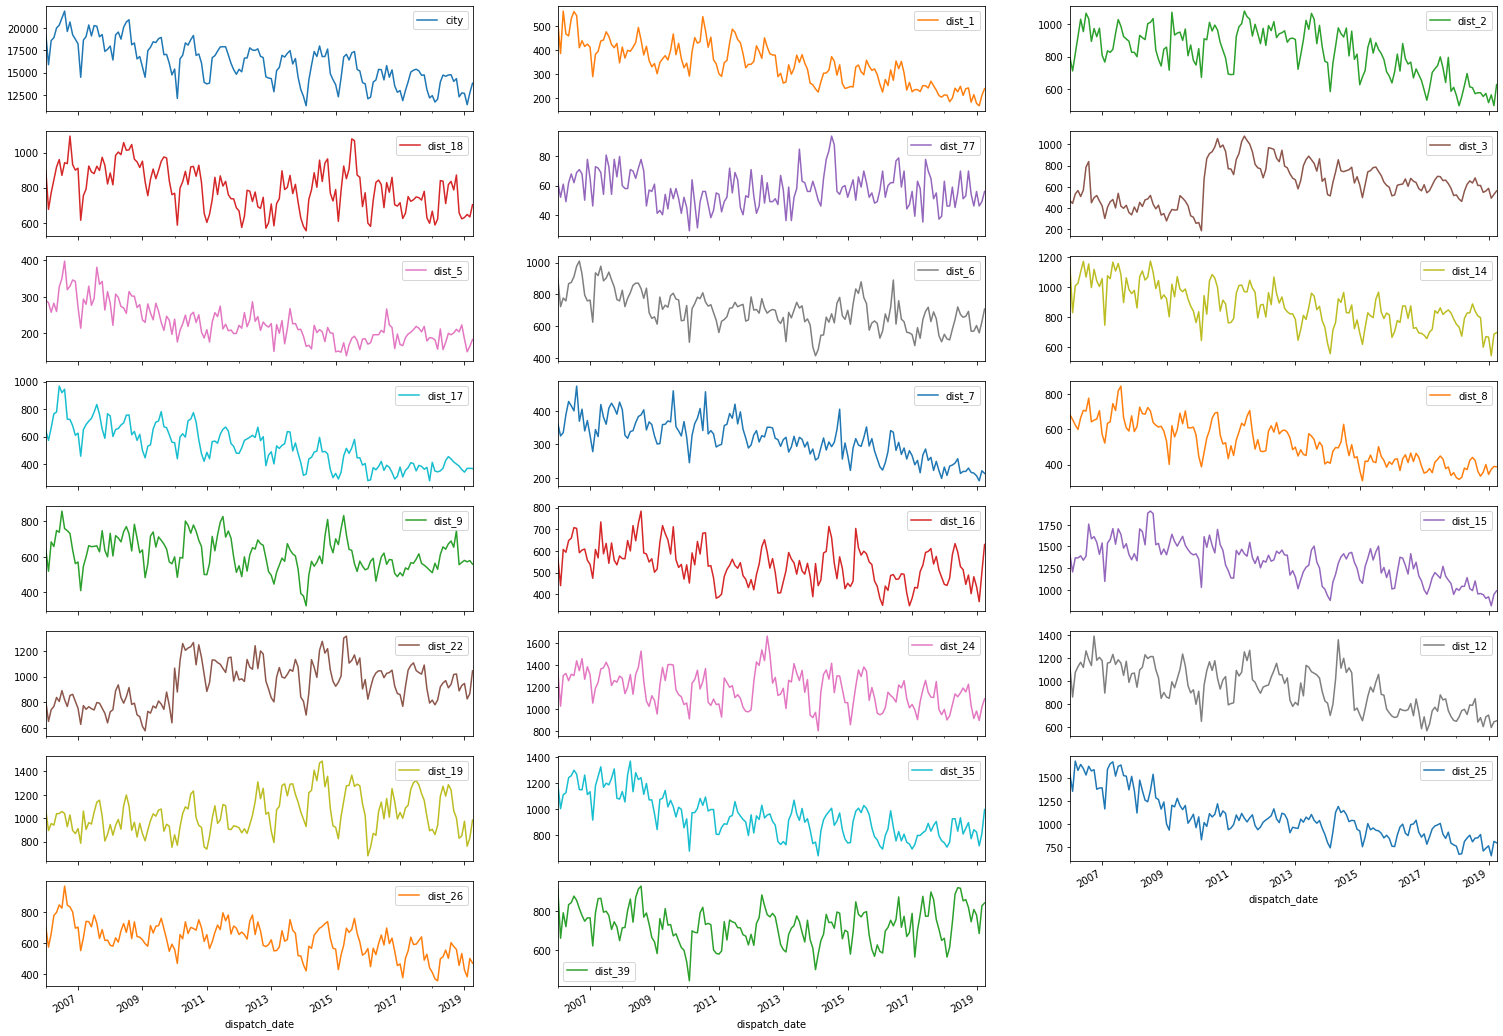

In [3]:
df.plot(subplots=True, layout=(8, 3), figsize=(26, 20), sharex=True,sharey=False);

/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/ba

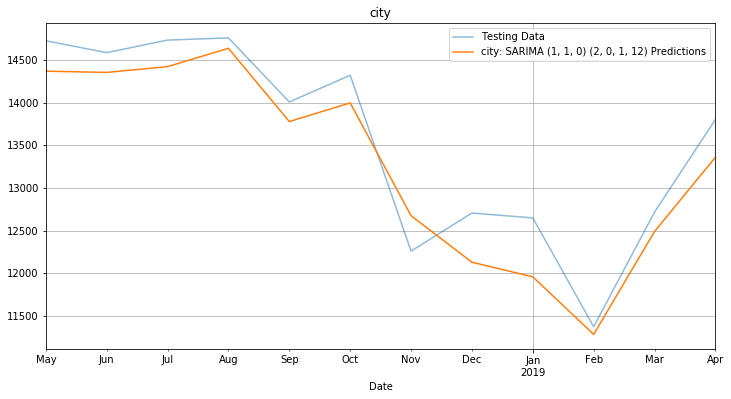

city
Error: 374.8792823847824
Test Mean: 13552.916666666666


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to conver

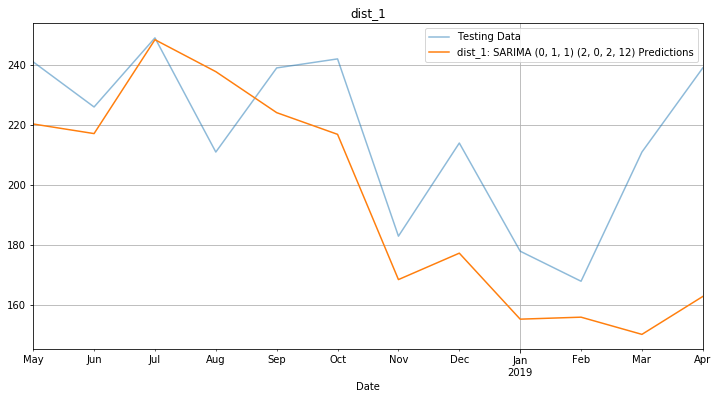

dist_1
Error: 33.84927968094753
Test Mean: 216.75


In [15]:
#################################################
#####  SARIMA for each district
#################################################

# Importing Libraries
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# List of Columns
columns = df.columns.tolist()

# Train Test Split: One year for testing
train = df.iloc[:148]
test = df.iloc[148:]

# Predictions DataFrame
predictions = pd.DataFrame()

# Forecast DataFrame
forecast = pd.DataFrame()

for col in columns:
    
    ######## Pyramid ARIMA ########
    
    # In this case the dataset has seasonality and m is every year = 12
    stepwise_fit = auto_arima(df[col],seasonal=True,trace=False,m=12)
    # Order
    order = stepwise_fit.order
    # Seasonal Order
    seasonal_order = stepwise_fit.seasonal_order
    
    ######## SARIMA ########
    
    model = SARIMAX(train[col],order=order,seasonal_order=seasonal_order) # enforce_invertibility=False
    results = model.fit()
    
    ######## Predictions ########
    
    start = len(train)
    end = len(train) + len(test) - 1
    
    # typ= 'levels' to return the differenced values to the original units
    preds = results.predict(start=start,end=end,typ='levels').rename('%s: SARIMA %s %s Predictions'%(col,order,seasonal_order))
    
    # Saving our predictions in a DataFrame
    predictions[col] = preds
    
    test[col].plot(figsize=(12,6),legend=True,alpha=0.5,label='Testing Data')
    preds.plot(legend=True,alpha=1)
    plt.grid(True)
    plt.xlabel('Date')
    plt.title(col)
    plt.show();
    
    ######## Evaluating the model ########
    
    error = rmse(test[col],preds) # Compare it with test.mean()
    print('%s\nError: %s\nTest Mean: %s'%(col,error,test[col].mean()))
    
#     ######## Forecasting for Future Data ########
    
#     # Refit with all the Data
#     model = SARIMAX(df[col],order=order,seasonal_order=seasonal_order) # Order is chosen from Pyramid ARIMA
#     results = model.fit(method='bfgs')

#     # Forecasting
#     start = len(df) 
#     end = len(df) + 12
#     # typ= 'levels' to return the differenced values to the original units
#     forecasted_values = results.predict(start=start,end=end,typ='levels').rename('%s: SARIMA %s %s Forecast'%(col,order,seasonal_order))
    
#     # Saving our forecast values in a DataFrame
#     forecast[col] = forecasted_values
    
#     # Plotting
#     df[col].plot(figsize=(12,6),legend=True)
#     forecasted_values.plot(legend=True)
#     plt.grid(True)
#     plt.show();